# 🛠 Titanic ETL Pipeline using Pandas & Scikit-learn

This notebook demonstrates a complete data pipeline for the Titanic dataset using Pandas and Scikit-learn. The steps include:

1. Handle missing values
2. Convert data types
3. Encode categorical values
4. Normalize numerical features
5. Feature engineering

Dataset: `Titanic` from `sklearn.datasets.fetch_openml`

Step 1: Import Required Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


Step 2: Load Titanic Dataset from OpenML

In [21]:
titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.frame.copy()

print("Shape of the dataset:", df.shape)

df.head()

Shape of the dataset: (1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
print("\nData types:\n", df.dtypes)

print("\nDescriptive statistics:\n")
display(df.describe(include='all'))

print("\nMissing values:\n")
print(df.isnull().sum().sort_values(ascending=False))



Data types:
 pclass          int64
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

Descriptive statistics:



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,2,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,0,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,809,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,NaN,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,NaN,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,NaN,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,NaN,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,NaN,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN



Missing values:

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
sibsp           0
name            0
survived        0
pclass          0
sex             0
parch           0
ticket          0
dtype: int64


Step 4: Data Cleaning

In [23]:
df.drop(columns=['cabin', 'boat', 'body', 'home.dest'], inplace=True)

df['pclass'] = df['pclass'].astype('category')

df['survived'] = df['survived'].astype(int)

print("Updated data types:\n", df.dtypes)


Updated data types:
 pclass      category
survived       int64
name          object
sex         category
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
embarked    category
dtype: object


Step 5: Exploratory Data Analysis (EDA)

Age Distribution

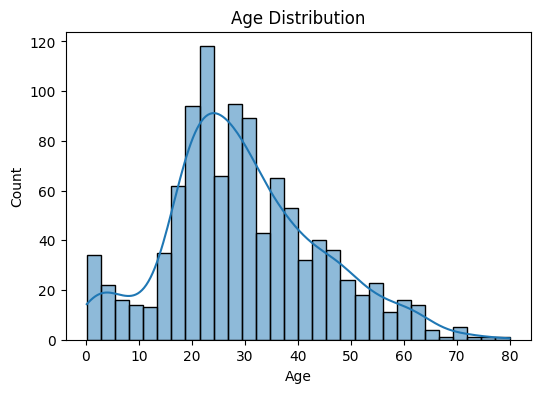

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Survival Count

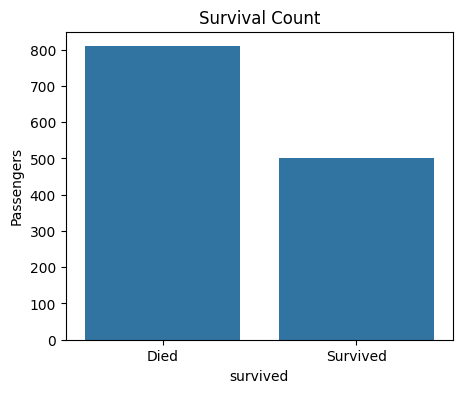

In [25]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.ylabel('Passengers')
plt.show()


Survival Count By Gender

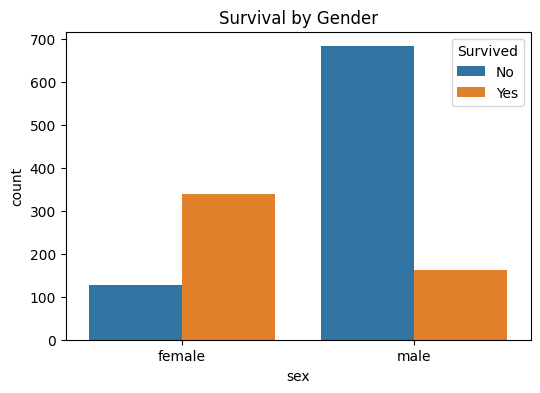

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Survival by Passenger Class

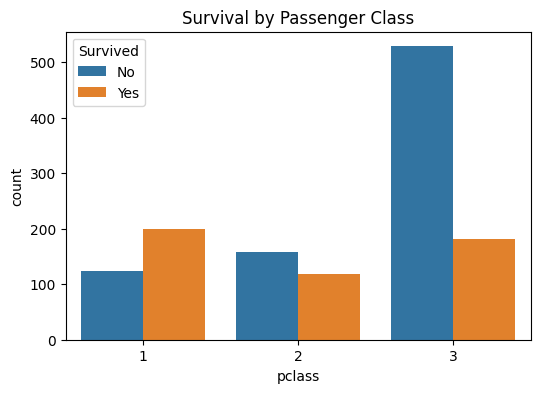

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Survival by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Survival by Embarkation Port

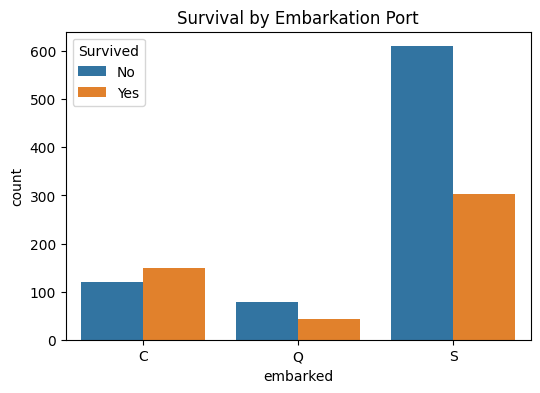

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='embarked', hue='survived')
plt.title('Survival by Embarkation Port')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Women survived at higher rates.

First-class passengers had better chances.

Younger people were more likely to survive.

Step 6: Handle Missing Values

In [28]:
df.isnull().sum().sort_values(ascending=False)

age         263
embarked      2
fare          1
pclass        0
survived      0
name          0
sibsp         0
sex           0
ticket        0
parch         0
dtype: int64

In [29]:
df['age'] = df['age'].fillna(df['age'].median())

df['fare'] = df['fare'].fillna(df['fare'].median())

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [30]:
print("Remaining missing values:\n")
print(df.isnull().sum())

Remaining missing values:

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


Step 7: Feature Engineering

In [31]:
df['title'] = df['name'].str.extract(r',\s*([^\.]*)\.', expand=False)

df['title'] = df['title'].replace(['Mlle', 'Ms'], 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df['title'] = df['title'].replace(['Dr', 'Major', 'Col', 'Capt', 'Rev', 'Don', 'Sir', 'Jonkheer', 'Countess', 'Lady'], 'Rare')


In [32]:
df['family_size'] = df['sibsp'] + df['parch'] + 1


In [33]:
df[['name', 'title', 'sibsp', 'parch', 'family_size']].head()


,name,title,sibsp,parch,family_size
0,"Allen, Miss. Elisabeth Walton",Miss,0,0,1
1,"Allison, Master. Hudson Trevor",Master,1,2,4
2,"Allison, Miss. Helen Loraine",Miss,1,2,4
3,"Allison, Mr. Hudson Joshua Creighton",Mr,1,2,4
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Mrs,1,2,4


Step 8: Encode Categorical Variables

In [34]:
categorical_cols = ['sex', 'embarked', 'pclass', 'title']

numerical_cols = ['age', 'fare', 'family_size']


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])


In [36]:
X = df[numerical_cols + categorical_cols]
y = df['survived']

X_transformed = preprocessor.fit_transform(X)

print("Transformed feature matrix shape:", X_transformed.shape)


Transformed feature matrix shape: (1309, 18)


Step 9: Save Transformed Data

In [37]:
if hasattr(X_transformed, 'toarray'):
    X_array = X_transformed.toarray()
else:
    X_array = X_transformed

X_df = pd.DataFrame(X_array)

X_df['survived'] = y.values

X_df.to_csv("titanic_transformed.csv", index=False)

print("Transformed dataset saved as 'titanic_transformed.csv'")


Transformed dataset saved as 'titanic_transformed.csv'
